In [1]:
import sys
sys.path.append("../src")

import os
import pyvips
from pathlib import Path
import concurrent.futures

import cv2
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
from tqdm import tqdm
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
from matplotlib.colors import LinearSegmentedColormap

from utils import (
    WSIDataset, get_args, save_results, 
    extract_coords, merge_patches, adjust_coords,
    get_save_dirs, get_model, ResNet, 
    SwinTransformer, BaseMIL, AttentionBasedMIL,
    multithread_read_img
)

/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
data_dir = os.path.join("..", "..", "raw-data", "patches", "experiment-0", "14732B")

os.path.isdir(data_dir)

True

In [3]:
img_dirs = [os.path.join(data_dir, f) for f in os.listdir(data_dir)]
coords = list(map(lambda x: extract_coords(x), img_dirs))

imgs = [cv2.imread(f) for f in img_dirs]

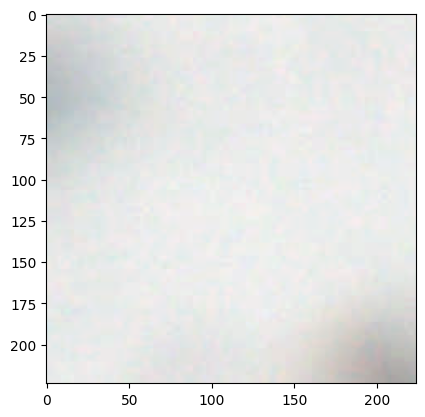

In [4]:
plt.imshow(imgs[0])
plt.show()

In [5]:
for img in imgs:
    cv2.rectangle(img, (0, 0), (223, 223), (0, 255, 0), thickness=30)

merged_patches = merge_patches(imgs, coords, 224)

crop_dim_y = int(merged_patches.shape[0] * 0.65)
crop_dim_x = int(merged_patches.shape[1] * 0.50)
center = merged_patches.shape[0] // 2

start_y = center - (crop_dim_y // 2)
end_y = center + (crop_dim_y // 2)

start_x = center - (crop_dim_x // 2)
end_x = center + (crop_dim_x // 2)

merged_patches = merged_patches[start_y:end_y, start_x:end_x].astype("uint8")

In [6]:
black_pixels = np.all(merged_patches == [0, 0, 0], axis=-1)
merged_patches[black_pixels] = [255, 255, 255]

cv2.imwrite("../assets/presentation-vis/patching2.png", merged_patches)

True